<h1 style='background-color:#BE3144; color:#222831; height:30px; padding:15px;'>Data Dictionary</h1>

* **DR_NO**: "Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits",
* **Date Rptd**: "MM/DD/YYYY",
* **DATE OCC**: "MM/DD/YYYY",
* **TIME OCC**: "In 24 hour military time.",
* **AREA**: "The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.",
* **AREA NAME**: "The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.",
* **Rpt Dist No**: "A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74a4b4db1_4 ",
* **Part 1-2**: "",
* **Crm Cd**: "Indicates the crime committed. (Same as Crime Code 1)",
* **Crm Cd Desc**: "Defines the Crime Code provided.",
* **Mocodes**: "Modus Operandi: Activities associated with the suspect in commission of the crime.See attached PDF for list of MO Codes in numerical order. https://data.lacity.org/api/views/y8tr-7khq/files/3a967fbd-f210-4857-bc52-60230efe256c?download=true&filename=MO%20CODES%20(numerical%20order).pdf",
* **Vict Age**: "Two character numeric",
* **Vict Sex**: "F - Female M - Male X - Unknown",
* **Vict Descent**: "Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian",
* **Premis Cd**: "The type of structure, vehicle, or location where the crime took place.",
* **Premis Desc**: "Defines the Premise Code provided.",
* **Weapon Used Cd**: "The type of weapon used in the crime. ",
* **Weapon Desc**: "Defines the Weapon Used Code provided.",
* **Status**: "Status of the case. (IC is the default)",
* **Status Desc**: "Defines the Status Code provided.",
* **Crm Cd 1**: "Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.",
* **Crm Cd 2**: "May contain a code for an additional crime, less serious than Crime Code 1. ",
* **Crm Cd 3**: "May contain a code for an additional crime, less serious than Crime Code 1.",
* **Crm Cd 4**: "May contain a code for an additional crime, less serious than Crime Code 1.",
* **LOCATION**: "Street address of crime incident rounded to the nearest hundred block to maintain anonymity.",
* **Cross Street**: "Cross Street of rounded Address",
* **LAT**: "Latitude",
* **LON**: "Longtitude"

<h1 style='background-color:#BE3144; color:#222831; height:30px; padding:15px;'>Importing Librarires</h1>

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn  import svm
from sklearn.ensemble import RandomForestClassifier,VotingClassifier;
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from collections import Counter
from sklearn.decomposition import PCA
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

<h1 style='background-color:#BE3144; color:#222831; height:30px; padding:15px;'>Understanding Data</h1>

In [8]:
df=pd.read_csv('LA_Crime_Data_from_2020_to_2024.csv')

In [10]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [12]:
df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
901352,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
901353,230618716,12/07/2023 12:00:00 AM,12/01/2023 12:00:00 AM,1000,6,Hollywood,647,2,901,VIOLATION OF RESTRAINING ORDER,...,IC,Invest Cont,901.0,NaN,NaN,NaN,1500 N BRONSON AV,NaN,34.0980,-118.3180
901354,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485
901355,230906458,03/05/2023 12:00:00 AM,03/05/2023 12:00:00 AM,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487
901356,230319786,11/10/2023 12:00:00 AM,11/09/2023 12:00:00 AM,2300,3,Southwest,395,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,4100 S HOBART BL,NaN,34.0091,-118.3078


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901357 entries, 0 to 901356
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           901357 non-null  int64  
 1   Date Rptd       901357 non-null  object 
 2   DATE OCC        901357 non-null  object 
 3   TIME OCC        901357 non-null  int64  
 4   AREA            901357 non-null  int64  
 5   AREA NAME       901357 non-null  object 
 6   Rpt Dist No     901357 non-null  int64  
 7   Part 1-2        901357 non-null  int64  
 8   Crm Cd          901357 non-null  int64  
 9   Crm Cd Desc     901357 non-null  object 
 10  Mocodes         775767 non-null  object 
 11  Vict Age        901357 non-null  int64  
 12  Vict Sex        781966 non-null  object 
 13  Vict Descent    781958 non-null  object 
 14  Premis Cd       901347 non-null  float64
 15  Premis Desc     900807 non-null  object 
 16  Weapon Used Cd  312268 non-null  float64
 17  Weapon Des

In [16]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           125590
Vict Age               0
Vict Sex          119391
Vict Descent      119399
Premis Cd             10
Premis Desc          550
Weapon Used Cd    589089
Weapon Desc       589089
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          835674
Crm Cd 3          899144
Crm Cd 4          901293
LOCATION               0
Cross Street      759302
LAT                    0
LON                    0
dtype: int64

### Inference / Understanding From The Data

* From the above null values summary we can say that, few of the features have null values:
  * For the features **Crm Cd 2** (92.71% of null values) , **Crm Cd 3** (99.75% of null values) , **Crm Cd 4** (99.89% of null values) , **Cross Street** (87.23% of null values) , than treating the missing values its better to drop the features from the data.
  * And the remaining missing features we will Treat the Missing Values.

* And from the above Data Dictionary we can see that for few of the features there are feature descrption columns which is useless like example,
  * **Crm Cd** , **Crm Cd Desc** here Crm Cd is Crime Commited Code value and Crm Cd Desc is description for the crime commited code.\
    They are few other columns where it gives us the descption of the previous or any other column in data, We are about to drop them.

* From above code snippets for few of the features, the dtype is not mathcing with the data dictinory, So we have to change them.

<h1 style='background-color:#BE3144; color:#222831; height:30px; padding:15px;'>Data Pre-Processing</h1>

In [20]:
drop_cols=["AREA NAME","Crm Cd Desc","Premis Desc","Weapon Desc","Status Desc","Crm Cd 2","Crm Cd 3","Crm Cd 4","Cross Street","Mocodes"]
#Dropping the columns of the above list drop_cols
df.drop(columns=drop_cols, axis=1, inplace=True)

In [22]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Crm Cd 1,LOCATION,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,784,1,510,0,M,O,101.0,NaN,AA,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,182,1,330,47,M,O,128.0,NaN,IC,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,356,1,480,19,X,X,502.0,NaN,IC,480.0,1400 W 37TH ST,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,964,1,343,19,M,O,405.0,NaN,IC,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,666,2,354,28,M,H,102.0,NaN,IC,354.0,1900 TRANSIENT,34.0944,-118.3277


In [24]:
df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Crm Cd 1,LOCATION,LAT,LON
901352,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,1602,1,230,25,F,H,102.0,400.0,IC,230.0,12800 FILMORE ST,34.2790,-118.4116
901353,230618716,12/07/2023 12:00:00 AM,12/01/2023 12:00:00 AM,1000,6,647,2,901,30,F,H,502.0,NaN,IC,901.0,1500 N BRONSON AV,34.0980,-118.3180
901354,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,154,1,352,24,F,H,735.0,NaN,IC,352.0,500 S MAIN ST,34.0467,-118.2485
901355,230906458,03/05/2023 12:00:00 AM,03/05/2023 12:00:00 AM,900,9,914,2,745,53,F,H,502.0,NaN,IC,745.0,14500 HARTLAND ST,34.1951,-118.4487
901356,230319786,11/10/2023 12:00:00 AM,11/09/2023 12:00:00 AM,2300,3,395,1,331,38,M,W,501.0,NaN,IC,331.0,4100 S HOBART BL,34.0091,-118.3078


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901357 entries, 0 to 901356
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           901357 non-null  int64  
 1   Date Rptd       901357 non-null  object 
 2   DATE OCC        901357 non-null  object 
 3   TIME OCC        901357 non-null  int64  
 4   AREA            901357 non-null  int64  
 5   Rpt Dist No     901357 non-null  int64  
 6   Part 1-2        901357 non-null  int64  
 7   Crm Cd          901357 non-null  int64  
 8   Vict Age        901357 non-null  int64  
 9   Vict Sex        781966 non-null  object 
 10  Vict Descent    781958 non-null  object 
 11  Premis Cd       901347 non-null  float64
 12  Weapon Used Cd  312268 non-null  float64
 13  Status          901357 non-null  object 
 14  Crm Cd 1        901346 non-null  float64
 15  LOCATION        901357 non-null  object 
 16  LAT             901357 non-null  float64
 17  LON       

In [28]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Vict Age               0
Vict Sex          119391
Vict Descent      119399
Premis Cd             10
Weapon Used Cd    589089
Status                 0
Crm Cd 1              11
LOCATION               0
LAT                    0
LON                    0
dtype: int64

* Since the null values in "Premis Cd" & "Crm Cd 1" the null values are least which is necligable while comparing to 901357 values in the dataframe, So lets drop only those particalr rows from the dataframe.

In [31]:
# Remove rows with null values in 'Premis Cd' and 'Crm Cd' columns
df.dropna(subset=['Premis Cd', 'Crm Cd 1'], inplace=True)

In [33]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Vict Age               0
Vict Sex          119381
Vict Descent      119389
Premis Cd              0
Weapon Used Cd    589071
Status                 0
Crm Cd 1               0
LOCATION               0
LAT                    0
LON                    0
dtype: int64

In [35]:
df['Vict Sex'].fillna(df['Vict Sex'].mode()[0], inplace=True)
df['Vict Descent'].fillna(df['Vict Descent'].mode()[0], inplace=True)

#Below its a warning please ignore it

In [37]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Vict Age               0
Vict Sex               0
Vict Descent           0
Premis Cd              0
Weapon Used Cd    589071
Status                 0
Crm Cd 1               0
LOCATION               0
LAT                    0
LON                    0
dtype: int64

In [39]:
from sklearn.linear_model import LinearRegression

# Separate rows with and without missing values
train_data = df[df['Weapon Used Cd'].notnull()]
missing_data = df[df['Weapon Used Cd'].isnull()]

# Train a regression model using other features
model = LinearRegression()
model.fit(train_data[['Crm Cd 1']], train_data['Weapon Used Cd'])

# Predict missing values
df.loc[df['Weapon Used Cd'].isnull(), 'Weapon Used Cd'] = model.predict(missing_data[['Crm Cd 1']])


In [41]:
df.isnull().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Weapon Used Cd    0
Status            0
Crm Cd 1          0
LOCATION          0
LAT               0
LON               0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 901336 entries, 0 to 901356
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           901336 non-null  int64  
 1   Date Rptd       901336 non-null  object 
 2   DATE OCC        901336 non-null  object 
 3   TIME OCC        901336 non-null  int64  
 4   AREA            901336 non-null  int64  
 5   Rpt Dist No     901336 non-null  int64  
 6   Part 1-2        901336 non-null  int64  
 7   Crm Cd          901336 non-null  int64  
 8   Vict Age        901336 non-null  int64  
 9   Vict Sex        901336 non-null  object 
 10  Vict Descent    901336 non-null  object 
 11  Premis Cd       901336 non-null  float64
 12  Weapon Used Cd  901336 non-null  float64
 13  Status          901336 non-null  object 
 14  Crm Cd 1        901336 non-null  float64
 15  LOCATION        901336 non-null  object 
 16  LAT             901336 non-null  float64
 17  LON            

In [45]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Crm Cd 1,LOCATION,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,784,1,510,0,M,O,101.0,363.916340,AA,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,182,1,330,47,M,O,128.0,329.586744,IC,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,356,1,480,19,X,X,502.0,358.194741,IC,480.0,1400 W 37TH ST,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,964,1,343,19,M,O,405.0,332.066104,IC,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,666,2,354,28,M,H,102.0,334.164024,IC,354.0,1900 TRANSIENT,34.0944,-118.3277


In [47]:
# Convert 'Date Rptd' and 'DATE OCC' columns to datetime with specified format
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


In [49]:
dtype_change = ['Premis Cd', 'Weapon Used Cd', 'Crm Cd 1']
df[dtype_change] = df[dtype_change].astype('int64')


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 901336 entries, 0 to 901356
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           901336 non-null  int64         
 1   Date Rptd       901336 non-null  datetime64[ns]
 2   DATE OCC        901336 non-null  datetime64[ns]
 3   TIME OCC        901336 non-null  int64         
 4   AREA            901336 non-null  int64         
 5   Rpt Dist No     901336 non-null  int64         
 6   Part 1-2        901336 non-null  int64         
 7   Crm Cd          901336 non-null  int64         
 8   Vict Age        901336 non-null  int64         
 9   Vict Sex        901336 non-null  object        
 10  Vict Descent    901336 non-null  object        
 11  Premis Cd       901336 non-null  int64         
 12  Weapon Used Cd  901336 non-null  int64         
 13  Status          901336 non-null  object        
 14  Crm Cd 1        901336 non-null  int64   

<h1 style='background-color:#BE3144; color:#222831; height:30px; padding:15px;'>Exploratory Data Analysis</h1>

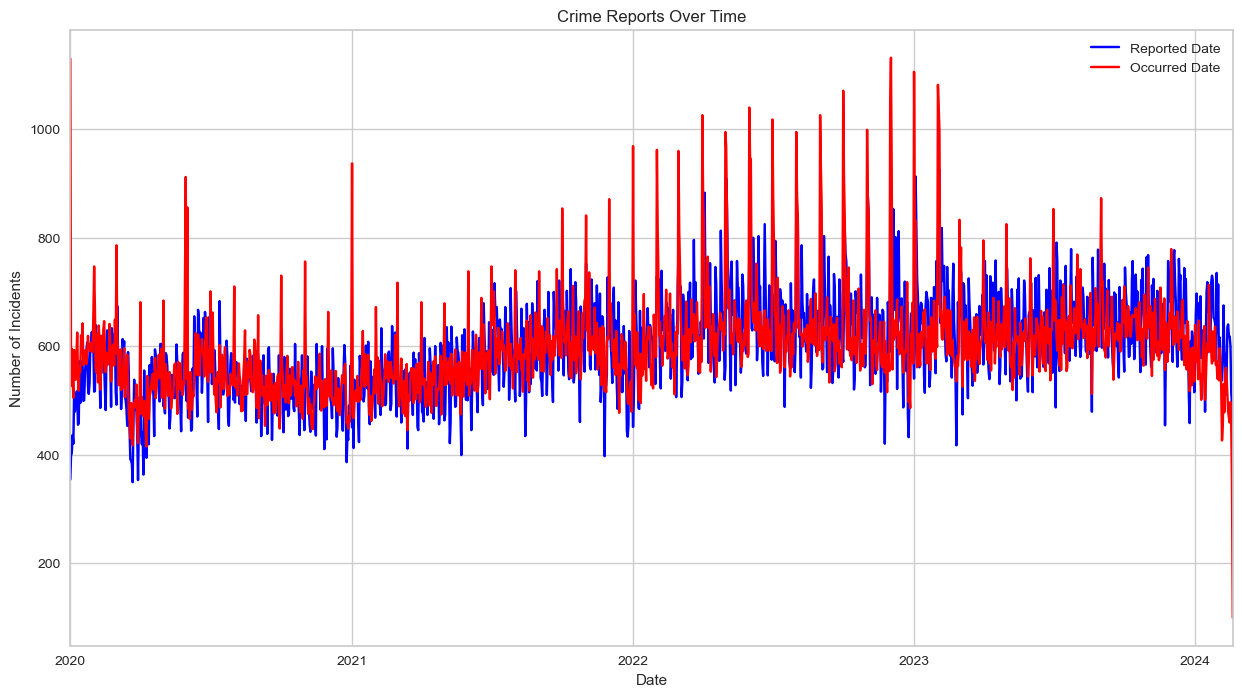

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'DR_NO' is a unique identifier, counting occurrences by date
# You can aggregate by counting the number of incidents per day
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format='%m/%d/%Y', errors='coerce')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y', errors='coerce')

# Group by date and count the occurrences
reported_data = df.groupby('Date Rptd').size()
occurred_data = df.groupby('DATE OCC').size()

# Check if the series are empty or not
if reported_data.empty or occurred_data.empty:
    print("Warning: One or both data series are empty!")
else:
    # Plotting the aggregated data
    fig, ax = plt.subplots(figsize=(15, 8))

    # Plotting the counts (only if data is available)
    if not reported_data.empty:
        reported_data.plot(kind='line', ax=ax, color='blue', label='Reported Date')
    if not occurred_data.empty:
        occurred_data.plot(kind='line', ax=ax, color='red', label='Occurred Date')

    # Adding title and labels
    ax.set_title('Crime Reports Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Incidents')

    # Setting the legend
    ax.legend()
    plt.grid(True)

    # Show the plot
    plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21')])

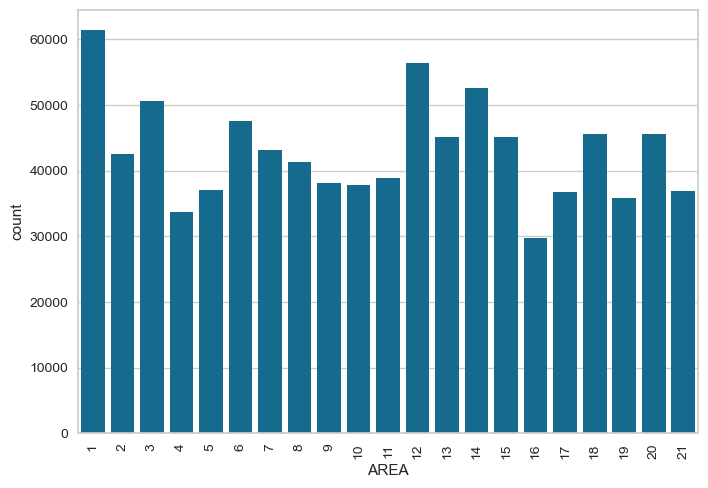

In [56]:
sns.countplot(data=df,x='AREA')
plt.xticks(rotation=90)

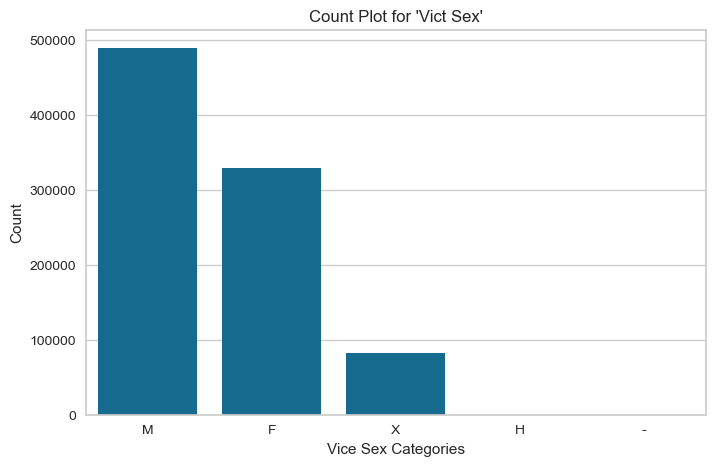

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 5))

# Create the count plot for 'VICE SEX'
sns.countplot(data=df, x='Vict Sex', order=df['Vict Sex'].value_counts().index)

# Add title and labels
plt.title("Count Plot for 'Vict Sex'")
plt.xlabel("Vice Sex Categories")
plt.ylabel("Count")

# Show the plot
plt.show()


<h1 style='background-color:#BE3144; color:#222831; height:30px; padding:15px;'>Splitting Numerical and Categorical Features</h1>

In [61]:
df_copy = df.copy()

# I am coping the original data frame, so that I will not losse original data frame.

In [63]:
df_copy.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Crm Cd 1,LOCATION,LAT,LON
0,190326475,2020-03-01,2020-03-01,2130,7,784,1,510,0,M,O,101,363,AA,510,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08,1800,1,182,1,330,47,M,O,128,329,IC,330,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,2020-11-11,2020-11-04,1700,3,356,1,480,19,X,X,502,358,IC,480,1400 W 37TH ST,34.0210,-118.3002
3,200907217,2023-05-10,2020-03-10,2037,9,964,1,343,19,M,O,405,332,IC,343,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,2022-08-18,2020-08-17,1200,6,666,2,354,28,M,H,102,334,IC,354,1900 TRANSIENT,34.0944,-118.3277


In [65]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Crm Cd 1,LOCATION,LAT,LON
0,190326475,2020-03-01,2020-03-01,2130,7,784,1,510,0,M,O,101,363,AA,510,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08,1800,1,182,1,330,47,M,O,128,329,IC,330,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,2020-11-11,2020-11-04,1700,3,356,1,480,19,X,X,502,358,IC,480,1400 W 37TH ST,34.0210,-118.3002
3,200907217,2023-05-10,2020-03-10,2037,9,964,1,343,19,M,O,405,332,IC,343,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,2022-08-18,2020-08-17,1200,6,666,2,354,28,M,H,102,334,IC,354,1900 TRANSIENT,34.0944,-118.3277


In [67]:
Y=df[["AREA"]]
df.drop('AREA', axis=1, inplace=True)

In [69]:
Y.head()

,AREA
0,7
1,1
2,3
3,9
4,6


In [71]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Crm Cd 1,LOCATION,LAT,LON
0,190326475,2020-03-01,2020-03-01,2130,784,1,510,0,M,O,101,363,AA,510,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08,1800,182,1,330,47,M,O,128,329,IC,330,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,2020-11-11,2020-11-04,1700,356,1,480,19,X,X,502,358,IC,480,1400 W 37TH ST,34.0210,-118.3002
3,200907217,2023-05-10,2020-03-10,2037,964,1,343,19,M,O,405,332,IC,343,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,2022-08-18,2020-08-17,1200,666,2,354,28,M,H,102,334,IC,354,1900 TRANSIENT,34.0944,-118.3277


* I have now dropped the target variable from the DataFrame and assigned it to **Y**.
* Next, I will split the numerical and categorical features from the DataFrame to prepare them for training.

In [74]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

In [76]:
num_cols=df.select_dtypes(include=['int64','float64']).columns

In [78]:
date_cols=df.select_dtypes(include=['datetime64[ns]']).columns

In [80]:
df_cat = df[cat_cols]  # DataFrame with categorical variables
df_num = df[num_cols]      # DataFrame with numerical variables
df_datetime=df[date_cols]

In [82]:
df_cat.head()

,Vict Sex,Vict Descent,Status,LOCATION
0,M,O,AA,1900 S LONGWOOD AV
1,M,O,IC,1000 S FLOWER ST
2,X,X,IC,1400 W 37TH ST
3,M,O,IC,14000 RIVERSIDE DR
4,M,H,IC,1900 TRANSIENT


In [84]:
df_num.head()

,DR_NO,TIME OCC,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,LAT,LON
0,190326475,2130,784,1,510,0,101,363,510,34.0375,-118.3506
1,200106753,1800,182,1,330,47,128,329,330,34.0444,-118.2628
2,200320258,1700,356,1,480,19,502,358,480,34.0210,-118.3002
3,200907217,2037,964,1,343,19,405,332,343,34.1576,-118.4387
4,220614831,1200,666,2,354,28,102,334,354,34.0944,-118.3277


In [86]:
df_datetime.head()

,Date Rptd,DATE OCC
0,2020-03-01,2020-03-01
1,2020-02-09,2020-02-08
2,2020-11-11,2020-11-04
3,2023-05-10,2020-03-10
4,2022-08-18,2020-08-17


<h1 style='background-color:#BE3144; color:#222831; height:30px; padding:15px;'>Encoding Categorical Features & Standarziation of Numerical Features</h1>

In [89]:
label_encoder = LabelEncoder()

# Apply Label Encoding to all columns in df_cat
df_cat = df_cat.apply(label_encoder.fit_transform)

In [91]:
df_cat.head()

,Vict Sex,Vict Descent,Status,LOCATION
0,3,12,0,21198
1,3,12,3,1823
2,4,18,3,13070
3,3,12,3,13260
4,3,7,3,21040


In [93]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply Standardization to df_num
df_num[:] = scaler.fit_transform(df_num)

In [95]:
df_num.head()

,DR_NO,TIME OCC,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,LAT,LON
0,-2.340428,1.214461,-0.544541,-0.835570,0.044118,-1.356574,-0.945466,0.016623,0.045401,0.028869,-0.049566
1,-1.507821,0.709158,-1.531080,-0.835570,-0.822781,0.795517,-0.821222,-0.417127,-0.822370,0.032907,-0.034745
2,-1.489645,0.556037,-1.245934,-0.835570,-0.100365,-0.486580,0.899793,-0.047164,-0.099227,0.019213,-0.041058
3,-1.439677,1.072057,-0.249563,-0.835570,-0.760172,-0.486580,0.453433,-0.378855,-0.759697,0.099153,-0.064438
4,0.238055,-0.209573,-0.737916,1.196789,-0.707195,-0.074477,-0.940864,-0.353341,-0.706667,0.062168,-0.045700


* We applied **Label Encoding** to convert categorical features into numerical values, enabling them to be used for model training.
* We performed **Standardization** on all numerical features to ensure they have the same scale, with a mean of 0 and a standard deviation of 1.

<h1 style='background-color:#BE3144; color:#222831; height:30px; padding:15px;'>Train Test Split</h1>

In [99]:
# Merging the three DataFrames along axis=1
X = pd.concat([df_num, df_cat], axis=1)

In [101]:
X.head()

,DR_NO,TIME OCC,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,LAT,LON,Vict Sex,Vict Descent,Status,LOCATION
0,-2.340428,1.214461,-0.544541,-0.835570,0.044118,-1.356574,-0.945466,0.016623,0.045401,0.028869,-0.049566,3,12,0,21198
1,-1.507821,0.709158,-1.531080,-0.835570,-0.822781,0.795517,-0.821222,-0.417127,-0.822370,0.032907,-0.034745,3,12,3,1823
2,-1.489645,0.556037,-1.245934,-0.835570,-0.100365,-0.486580,0.899793,-0.047164,-0.099227,0.019213,-0.041058,4,18,3,13070
3,-1.439677,1.072057,-0.249563,-0.835570,-0.760172,-0.486580,0.453433,-0.378855,-0.759697,0.099153,-0.064438,3,12,3,13260
4,0.238055,-0.209573,-0.737916,1.196789,-0.707195,-0.074477,-0.940864,-0.353341,-0.706667,0.062168,-0.045700,3,7,3,21040


In [105]:
Y.head()

,AREA
0,7
1,1
2,3
3,9
4,6


In [107]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [109]:
print("x_train: {}".format(x_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

x_train: (721068, 15)
x_test: (180268, 15)
y_train: (721068, 1)
y_test: (180268, 1)


<h1 style='background-color:#BE3144; color:#222831; height:30px; padding:15px;'>Model Training</h1>

### Logestic Regression

In [113]:
LR = LogisticRegression(multi_class='multinomial', solver='lbfgs')
LR.fit(x_train,y_train)
y_predicted_LR = LR.predict(x_test)
score = LR.score(x_test, y_test)
LR_score_ = np.mean(score)
print('Accuracy : %.3f' % (LR_score_))

Accuracy : 0.150


In [115]:
print(classification_report(y_test, y_predicted_LR))

              precision    recall  f1-score   support

           1       0.16      0.73      0.26     12292
           2       0.00      0.00      0.00      8611
           3       0.19      0.10      0.13     10070
           4       0.00      0.00      0.00      6653
           5       0.21      0.02      0.04      7409
           6       0.08      0.06      0.07      9565
           7       0.19      0.01      0.01      8780
           8       0.00      0.00      0.00      8235
           9       0.06      0.00      0.00      7627
          10       0.00      0.00      0.00      7551
          11       0.00      0.00      0.00      7939
          12       0.16      0.45      0.23     11291
          13       0.29      0.05      0.09      8955
          14       0.17      0.10      0.12     10419
          15       0.15      0.07      0.09      8965
          16       0.00      0.00      0.00      6002
          17       0.07      0.39      0.12      7213
          18       0.24    

### Decision Tree

In [118]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
decision_tree_classification.fit(x_train, y_train)
y_predicted_DT = decision_tree_classification.predict(x_test)
score = decision_tree_classification.score(x_test, y_test)
DT_score_ = np.mean(score)
print('Accuracy : %.3f' % (DT_score_))

Accuracy : 1.000


### Random Forest

In [121]:
RFC = RandomForestClassifier(random_state=42)
RFC.fit(x_train,y_train)
y_predicted = RFC.predict(x_test)
score = RFC.score(x_test, y_test)
rf_score_ = np.mean(score)
print('Accuracy : %.3f' % (rf_score_))

Accuracy : 1.000


### KNN

In [124]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)
y_predicted_KNN = KNN.predict(x_test)
score = KNN.score(x_test, y_test)
KNN_score_ = np.mean(score)
print('Accuracy : %.3f' % (KNN_score_))

Accuracy : 0.795
